# Quality Assessment
Now it's your turn. Follow [the steps on the platform](https://learn.wbscodingschool.com/courses/data-science/lessons/%f0%9f%93%9d-5-data-quality/) and use what you've learnt to see how reliable the data is.

In [1]:
import pandas as pd

Load our cleaned DataFrames

In [30]:
# orders_cl.csv
url = "https://drive.google.com/file/d/1M2IXTLWG80C5D_TLHp1A7HydUPBUdCqD/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_cl = pd.read_csv(path)

# orderlines_cl.csv
url = "https://drive.google.com/file/d/1V4zxd9DkFph7HrThDfuiHVDtkIvMK7aI/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_cl = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1SaSDac7JgYc3vNBV87SpFlUNfoQMdH8Y/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

In [31]:
orders_qu = orders_cl.copy()
orderlines_qu = orderlines_cl.copy()
products_qu = products_cl.copy()

## 1.&nbsp; Define Pandas display format

In [32]:
def float_format(number):
  return "%.2f" % number

In [33]:
pd.set_option("display.float_format", float_format)
pd.set_option("display.max_rows", 1000)

## 2.&nbsp; Exclude unwanted orders

In [34]:
orders_qu['state'].value_counts()

,count
state,
Shopping Basket,117809
Completed,46605
Place Order,40883
Pending,14379
Cancelled,7233


In [35]:
orders_qu= orders_qu.loc[orders_qu['state']=='Completed']

In [36]:
orders_qu['order_id'].nunique()

46605

In [37]:
orderlines_qu['order_id'].nunique()

204855

In [38]:
orders_orderlines = orders_qu.merge(orderlines_qu,
                                    right_on='order_id',
                                    left_on='order_id',
                                    how='inner')

In [39]:
orders_orderlines['order_id'].nunique()

46560

In [40]:
order_ids = orders_orderlines['order_id'].unique()

In [41]:
order_ids_set = set(orders_qu['order_id'])\
.intersection(set(orderlines_qu['order_id']))

In [42]:
pd.Series(order_ids).isin(order_ids_set).all()

True

In [43]:
#let's filter the two dataframers, removing the uncommon oids
orders_qu = \
  orders_qu.loc[orders_qu['order_id'].isin(order_ids)]

In [44]:
orderlines_qu = \
  orderlines_qu.loc[orderlines_qu['order_id'].isin(order_ids)]

In [45]:
pd.Series(orders_qu['order_id'].unique())\
  .isin(orderlines_qu['order_id'].unique()).all()

True

## 3.&nbsp; Exclude orders with unknown products


In [46]:
orderlines_qu['sku'].nunique()

6048

In [47]:
orderlines_products = orderlines_qu.merge(products_qu,
                                          on='sku',
                                          how='left')

In [48]:
orderlines_products['name'].isna().value_counts()

missingnames = orderlines_products[orderlines_products['name'].isna()]

missingnames

,id,order_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type
28,1119316,299638,1,SYN0127,223.24,2017-01-01 11:56:18,NaN,NaN,259.99,254.16,0,NaN
47,1119477,299706,1,EVU0007,28.49,2017-01-01 13:57:16,NaN,NaN,29.99,29.91,0,NaN
50,1119494,299712,1,APP0608,279.99,2017-01-01 14:10:47,NaN,NaN,289.00,280.71,0,NaN
122,1120084,300029,1,SYN0127,223.24,2017-01-01 22:00:19,NaN,NaN,259.99,254.16,0,NaN
188,1120534,300251,1,APP0608,279.99,2017-01-02 07:48:49,NaN,NaN,289.00,280.71,0,NaN
231,1120742,300340,1,APP0607,279.99,2017-01-02 10:37:25,NaN,NaN,289.00,278.60,0,NaN
337,1121348,300558,1,APP0608,279.99,2017-01-02 13:46:20,NaN,NaN,289.00,280.71,0,NaN
546,1122697,301178,1,APP0608,279.99,2017-01-02 23:48:55,NaN,NaN,289.00,280.71,0,NaN
572,1122861,301232,1,SYN0127,234.99,2017-01-03 01:23:09,NaN,NaN,259.99,254.16,0,NaN
623,1123130,301386,1,PAC1155,418.99,2017-01-03 10:43:19,NaN,NaN,447.99,434.69,0,NaN


1. Find out what OLs have missing SKU
2. Get the order_id of these OLs
3. Remove all OLs with order_ids

In [21]:
order_ids_to_remove = orderlines_products\
.loc[orderlines_products['name'].isna(),'order_id']

In [22]:
#remove the entire order from orders and orderlines
orders_qu = orders_qu\
  .loc[~orders_qu['order_id'].isin(order_ids_to_remove)]

In [23]:
orderlines_qu = orderlines_qu\
  .loc[~orderlines_qu['order_id'].isin(order_ids_to_remove)]

In [49]:
#sanity check
orders_qu['order_id'].nunique(), orderlines_qu['order_id'].nunique()

(46560, 46560)

## 4.&nbsp; Explore the revenue from different tables

#### Step 1:
Create the `unit_price_total` as `orderlines.unit_price` * `orderlines.product_quantity`

In [50]:
orderlines_qu_copy = orderlines_qu.copy()

In [51]:
orders_qu_copy = orders_qu.copy()

In [52]:
orderlines_qu_copy['unit_price_total']=\
      orderlines_qu_copy['unit_price']\
      *orderlines_qu_copy['product_quantity']

In [53]:
orderlines_qu_copy

,id,order_id,product_quantity,sku,unit_price,date,unit_price_total
7,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49
8,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99
9,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19
11,1119126,299549,1,PAC0929,2565.99,2017-01-01 02:07:42,2565.99
18,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90
...,...,...,...,...,...,...,...
293599,1649474,525664,1,TUC0207,16.52,2018-03-14 11:45:05,16.52
293616,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98
293621,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98
293644,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97


#### Step 2:
Group by `order_id`, summarising by the sum of `unit_price_total`

In [54]:
orderlines_totals = (
    orderlines_qu_copy
    .groupby('order_id', as_index=False)
    ['unit_price_total']
    .sum()
)

In [55]:
orderlines_totals

,order_id,unit_price_total
0,241423,129.16
1,242832,10.77
2,243330,77.99
3,245275,149.00
4,245595,105.98
...,...,...
46555,527042,13.99
46556,527070,19.98
46557,527074,19.98
46558,527096,29.97


### What is the average difference between `total_paid` and `unit_price_total`?

In [56]:
diff_df = orders_qu_copy.merge(orderlines_totals,
                     left_on='order_id',
                     right_on='order_id')

In [84]:
diff_df['difference'] = diff_df['total_paid'] - diff_df['unit_price_total']

import numpy as np

mask = np.isclose(diff_df['difference'], 6.99, atol=1e-2) | \
       np.isclose(diff_df['difference'], 4.99, atol=1e-2) | \
       np.isclose(diff_df['difference'], 0.00, atol=1e-2)

# Invert the mask for `discounts` column
diff_df['discounts'] = ~mask

In [86]:
diff_df = diff_df.loc[diff_df['discounts']==True]

In [87]:
print(diff_df)



       order_id         created_date  total_paid      state  unit_price_total  \
6        246405  2017-11-24 10:01:27      407.96  Completed            275.75   
9        250275  2017-11-19 22:34:54       54.99  Completed             51.00   
11       251688  2017-11-24 23:57:07      505.76  Completed            485.77   
12       251969  2017-11-21 21:04:12      610.07  Completed            590.08   
14       253306  2017-10-04 14:14:45      497.68  Completed            477.68   
...         ...                  ...         ...        ...               ...   
46540    526985  2018-03-14 11:38:40       13.98  Completed              9.99   
46542    526996  2018-03-14 11:37:33       17.98  Completed             13.99   
46544    527013  2018-03-14 11:42:54       46.99  Completed             43.00   
46546    527022  2018-03-14 11:53:31       31.97  Completed             27.98   
46548    527024  2018-03-14 11:39:58       17.98  Completed             13.99   

       difference  discount

In [59]:
diff_df['difference'].mean()

4.23872573024055

In [60]:
diff_df['difference'].min(), diff_df['difference'].max()

(-165.0, 3984.99)

### What is the distribution of these differences?

<Axes: >

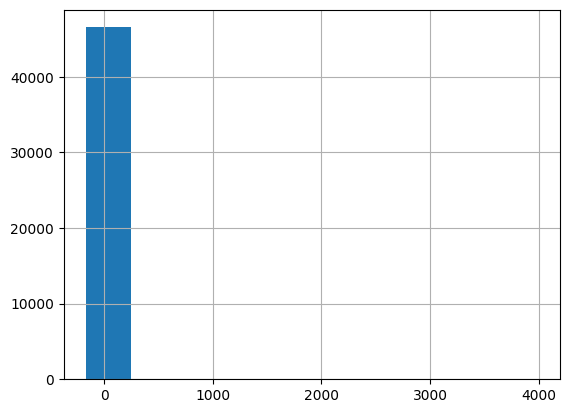

In [61]:
diff_df['difference'].hist()

In [62]:
diff_df['difference'].describe()

,difference
count,46560.00
mean,4.24
std,24.72
min,-165.00
25%,0.00
50%,4.99
75%,6.99
max,3984.99


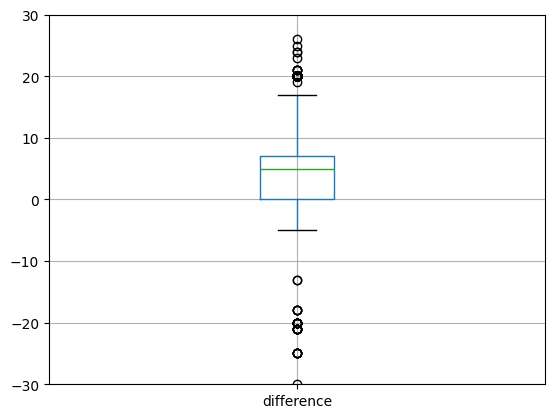

In [63]:
import matplotlib.pyplot as plt
ax = diff_df.boxplot('difference')
ax.set_ylim(-30,+30)
plt.show()

### Can all the differences be explained by shipping costs? If not, what are other plausible explanations?

In [ ]:
# your explanation here

### If there are differences that you can’t explain: what should you do with these orders?

In [64]:
#upper bound
#Q3 + 1.5 IQR
Q3 = diff_df['difference'].quantile(0.75)
#lower bound
Q1 = diff_df['difference'].quantile(0.25)

In [65]:
IQR = Q3-Q1

In [66]:
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
upper,lower

(17.47499999999995, -10.484999999999971)

In [67]:
diff_no_outliers_df = diff_df.loc[
    (diff_df['difference']<= upper)
    &
    (diff_df['difference']>=lower)
]

<Axes: >

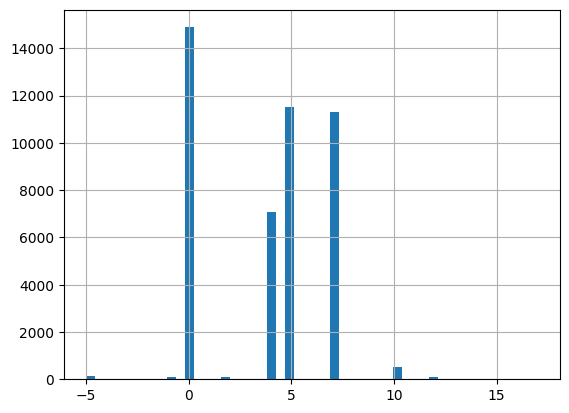

In [68]:
diff_no_outliers_df['difference'].hist(bins=50)

<Axes: >

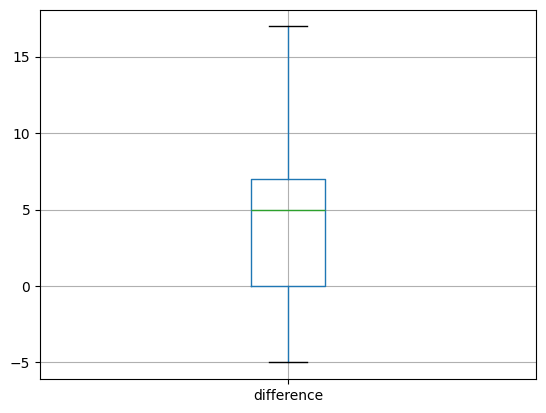

In [69]:
diff_no_outliers_df.boxplot('difference')

## 5.&nbsp; Become confident about your dataset

Let's hear your thoughts about what you discovered.

Do not forget to download your quality controlled DataFrames

In [71]:
from google.colab import files

orders_qu_copy.to_csv("orders_qc.csv", index=False)
files.download("orders_qc.csv")

orderlines_qu_copy.to_csv("orderlines_qc.csv", index=False)
files.download("orderlines_qc.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>